<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/ImageClassificationPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST Image Classification With Pytorch NN

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [17]:
trainset = datasets.MNIST'PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/cifar-10-python.tar.gz to PATH_TO_STORE_TRAINSET


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/cifar-10-python.tar.gz to PATH_TO_STORE_TESTSET


In [18]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


TypeError: ignored

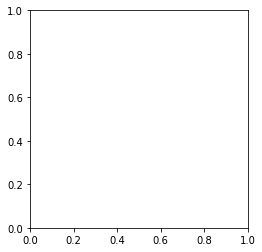

In [19]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

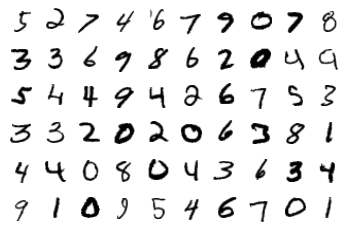

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

In [8]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],output_size ),
                      nn.LogSoftmax(dim=1))

In [9]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [10]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)#flatten

logs = model(images) #log probabilities
loss = criterion(logs, labels) #calculate the NLL loss

In [11]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017]])


In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [13]:
epoch_=[]
loss_=[]


In [14]:

time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
        
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.348656781530107
Epoch 1 - Training loss: 0.1819925849149222
Epoch 2 - Training loss: 0.14001542314299262
Epoch 3 - Training loss: 0.12047602220434449
Epoch 4 - Training loss: 0.11335510148930905
Epoch 5 - Training loss: 0.10062371143229258
Epoch 6 - Training loss: 0.0998800463238751
Epoch 7 - Training loss: 0.09744542702160744
Epoch 8 - Training loss: 0.08633704820840454
Epoch 9 - Training loss: 0.08583581774277853
Epoch 10 - Training loss: 0.08351461218036056
Epoch 11 - Training loss: 0.07807503830217548
Epoch 12 - Training loss: 0.0766502209900092
Epoch 13 - Training loss: 0.07283828432844487
Epoch 14 - Training loss: 0.06852859886500166

Training Time (in minutes) = 2.921226223309835


In [15]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logs = model(img)

ps = torch.exp(logs)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))


Predicted Digit = 6


In [16]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9638
